## Understat Shot Map

Create football shot maps using Understat shot data. Toggle between "True" and "False" for the "highlight_goals" parameter to select type of shotmap. The pitch is plotted thanks to the mplsoccer library. The data scraping is thanks to Aaron Moniz (@amonizfootball on twitter).

In [16]:
#fill out necessarry information of about player and plot type here

player_id = 6420 #undestat player id
is_season = True #if is_season = True, then specify season
season = 2020 #2020 corresponds to 2020/21 
highlight_goals = False

In [17]:
#import libraries

import pandas as pd
import numpy as np 
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
from mplsoccer.pitch import Pitch, VerticalPitch
import requests

In [18]:
#data scraping 

base = "https://understat.com/player/"
player_id = str(player_id)
base_url = base + player_id
url = base_url
res = requests.get(url)
soup = BeautifulSoup(res.content,"lxml")

scripts = soup.find_all('script')
strings = scripts[3].string

ind_start = strings.index("('")+2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

finaldata = pd.DataFrame.from_dict(data)

In [19]:
# Data Wrangling

finaldata["X"] = pd.to_numeric(finaldata["X"])
finaldata["Y"] = pd.to_numeric(finaldata["Y"])
finaldata["season"] = pd.to_numeric(finaldata["season"])
finaldata["minute"] = pd.to_numeric(finaldata["minute"])
finaldata["xG"] = pd.to_numeric(finaldata["xG"])

finaldata["X"] = finaldata["X"] * 120
finaldata["Y"] = finaldata["Y"] * 80    

finaldata = finaldata[finaldata["situation"] != "Penalty"]
finaldata = finaldata[["result", "X", "Y", "xG", "player", "season"]]

if is_season == True:
        finaldata = finaldata[finaldata["season"] == season]
        year = {2014: "2014/15", 2015: "2015/16", 2016: "2016/17", 2017: "2017/18", 2018: "2018/19", 
                2019: "2019/20", 2020: "2020/21", 2021: "2021/22"}
        finaldata["season"] = finaldata["season"].map(year)
        szn = finaldata["season"].values[0]
        x = 45.2
        y = 62
elif is_season == False:
        finaldata["all"] = finaldata["season"]
        finaldata["all"] = "All Seasons"
        szn = finaldata["all"].values[0]
        x = 47
        y = 62

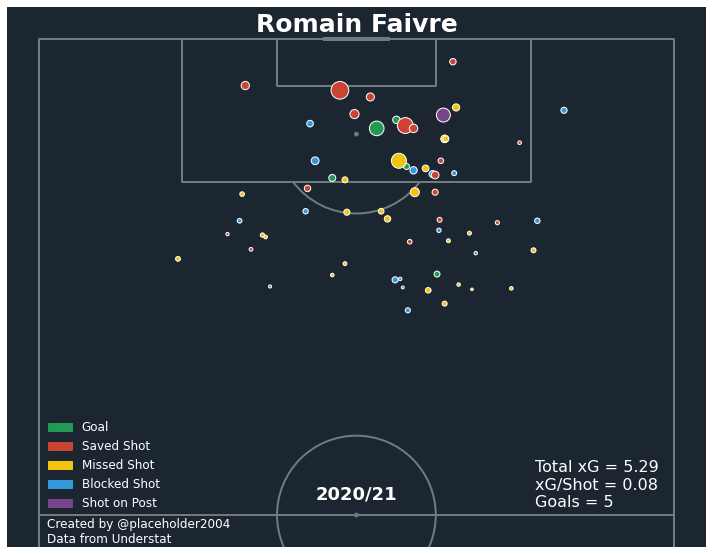

In [20]:
#plotting

if highlight_goals == False:
        colours = {'Goal':'#229954', 'SavedShot':'#CB4335', 'MissedShots':'#F1C40F', 
                   'BlockedShot':'#3498DB', 'ShotOnPost':'#76448A'}
        player_name = finaldata["player"].values[0]
        res = {"Goal": 1, "SavedShot": 0, "BlockedShot": 0, "ShotOnPost": 0, 
               "MissedShots": 0, "OwnGoal": 0} 
        finaldata["isGoal"] = finaldata["result"].map(res)
        finaldata["col"] = finaldata["result"].map(colours)
        finaldata = finaldata.dropna()

        xG = sum(finaldata["xG"])
        xG = str(round(xG, 2))
        xgst = sum(finaldata["xG"]) / len(finaldata.index)
        xgst = str(round(xgst, 2))
        gls = sum(finaldata["isGoal"])

        g = mpatches.Patch(color = "#229954", label = "Goal")
        ss = mpatches.Patch(color = "#CB4335", label = "Saved Shot")
        ms = mpatches.Patch(color = "#F1C40F", label = "Missed Shot")
        bs = mpatches.Patch(color = "#3498DB", label = "Blocked Shot")
        sop = mpatches.Patch(color = "#76448A", label = "Shot on Post")

        pitch = VerticalPitch(pitch_color='#1B2631', line_color = "#707B7C", stripe=False, half = True, 
                              constrained_layout = True)
        fig, ax = pitch.draw()
        plt.scatter(x = finaldata["Y"], y = finaldata["X"], s = finaldata["xG"] * 600, c = finaldata["col"], 
                    edgecolors="white")
        plt.gca().invert_xaxis()
        plt.text(x, y, f"{szn}", color="white", size= 18, fontweight = "bold")
        plt.text(17.5, 61, f"Total xG = {xG}\nxG/Shot = {xgst}\nGoals = {gls}", size = 16, color = "white")
        plt.text(79, 56.5, "Created by @placeholder2004\nData from Understat", color = "white", size = 12)
        plt.title(f"{player_name}", color = "white", fontweight = "bold", size = 25, pad = -25)
        leg = plt.legend(handles = [g, ss, ms, bs, sop], frameon = False, loc = "center left", 
                         bbox_to_anchor=(0.043,0.15), prop={'size': 12})

        for text in leg.get_texts():
            text.set_color("white")
    
elif highlight_goals == True:
        gls = {'Goal':"Goal", 'SavedShot': "NoGoal", 'MissedShots': "NoGoal", 
               'BlockedShot': "NoGoal", 'ShotOnPost': "NoGoal"}
        colours = {'Goal':"#E74C3C", 'NoGoal': "#1B2631"}
        finaldata["result"] = finaldata["result"].map(gls)
        player_name = finaldata["player"].values[0]
        res = {"Goal": 1, "NoGoal": 0} 
        finaldata["isGoal"] = finaldata["result"].map(res)
        finaldata["col"] = finaldata["result"].map(colours)
        finaldata = finaldata.dropna()

        xG = sum(finaldata["xG"])
        xG = str(round(xG, 2))
        xgst = sum(finaldata["xG"]) / len(finaldata.index)
        xgst = str(round(xgst, 2))
        gls = sum(finaldata["isGoal"])

        g = mpatches.Patch(color = "#E74C3C", label = "Goal")
        ss = mpatches.Patch(color = "#ffffff", label = "No Goal")

        pitch = VerticalPitch(pitch_color='#1B2631', line_color = "#707B7C", stripe=False, half = True, 
                              constrained_layout = True)
        fig, ax = pitch.draw()
        plt.scatter(x = finaldata["Y"], y = finaldata["X"], s = finaldata["xG"] * 600, c = finaldata["col"], 
                    edgecolors="white")
        plt.gca().invert_xaxis()
        plt.text(x, y, f"{szn}", color="white", size= 18, fontweight = "bold")
        plt.text(17.5, 61, f"Total xG = {xG}\nxG/Shot = {xgst}\nGoals = {gls}", size = 16, color = "white")
        plt.text(79, 56.5, "Created by @placeholder2004\nData from Understat", color = "white", size = 12)
        plt.title(f"{player_name}", color = "white", fontweight = "bold", size = 25, pad = -25)
        leg = plt.legend(handles = [g, ss], frameon = False, loc = "center left", 
                         bbox_to_anchor=(0.05,0.1), prop={'size': 12})

        for text in leg.get_texts():
            text.set_color("white")

fig.set_size_inches(10, 8)
plt.savefig("shotmap.png", dpi = 900)
plt.show()